In [99]:
# import our dependencies

%matplotlib inline
from collections import Counter
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import numpy as np
import os

## PCA + Oversampling (Random Oversampling) + Logistic Regression (SFRs)

In [100]:
file = 'Hollywood_Cleaned.csv'

location = '/Users/Admin/Desktop/GW_Bootcamp/Analysis_Projects/Final_Project_Team_1/'

In [101]:
path = os.path.join(location, file)

In [102]:
# bring in our dataframe

Hollywood_df = pd.read_csv(path, index_col='PARCEL')
Hollywood_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,SHERIFFS,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5524005031,0,0,815 N Las Palmas Ave #101,1,0,0,189433,47704,141729,0,...,0,0,0,0,0,0,1,0,0,0
5537019032,0,0,1062 N Kingsley Dr,1,0,1,113490,112082,1408,0,...,1,0,0,0,0,0,0,0,0,0
5535011014,0,0,835 N Western Ave,1,0,0,269134,235503,33631,0,...,0,0,0,0,0,0,0,0,0,0
5537009909,0,0,1107 N Kingsley Dr,1,0,0,67146,67146,0,0,...,0,0,0,0,0,0,0,0,0,0
5534006007,0,0,6219 Banner Ave,0,0,0,421839,186956,234883,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
# drop any nulls

Hollywood_df = Hollywood_df.dropna()

In [104]:
len(Hollywood_df)

3470

In [105]:
# Change the datatype of these two columns into ints

Hollywood_df['TAXAMT'] = Hollywood_df['TAXAMT'].astype(int)
Hollywood_df['EFFYRBLT'] = Hollywood_df['EFFYRBLT'].astype(int)

In [106]:
# Make sure our dataframe is only SFR's so exclude every property that has an '#' in its site address

Hollywood_df = Hollywood_df[~Hollywood_df['SITEADDRESS'].str.contains('#')]
Hollywood_df.head(3)

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,SHERIFFS,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5537019032,0,0,1062 N Kingsley Dr,1,0,1,113490,112082,1408,0,...,1,0,0,0,0,0,0,0,0,0
5535011014,0,0,835 N Western Ave,1,0,0,269134,235503,33631,0,...,0,0,0,0,0,0,0,0,0,0
5537009909,0,0,1107 N Kingsley Dr,1,0,0,67146,67146,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
len(Hollywood_df)

2068

In [108]:
# Now drop the SiteAddress column
Hollywood_df.drop(['SITEADDRESS'], axis=1, inplace=True)

In [109]:
Hollywood_df.head(3)

,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,EXEMPTCD,...,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,SHERIFFS,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5537019032,0,0,1,0,1,113490,112082,1408,0,0,...,1,0,0,0,0,0,0,0,0,0
5535011014,0,0,1,0,0,269134,235503,33631,0,0,...,0,0,0,0,0,0,0,0,0,0
5537009909,0,0,1,0,0,67146,67146,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
# Step 1: Create our X and y

y = Hollywood_df['Did it sell?']
X = Hollywood_df.drop(['Did it sell?'], 1)

In [111]:
APN = Hollywood_df.index.values
APN

array([5537019032, 5535011014, 5537009909, ..., 5533002083, 5534017019,
       5550019006])

In [112]:
# Step 2: Use PCA to reduce dimension to three principal components.
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [113]:
X_pca

array([[-555143.51062686,   93214.34534779,  396355.15522729],
       [-393313.13213264,  -37677.19686051,  246378.1295548 ],
       [-566864.5461325 ,  105734.21685615,  456274.71260102],
       ...,
       [-404925.04889882,  -75115.40820629, -402390.97295949],
       [  69785.28229203, -406120.04579266, -135955.35954028],
       [8016695.09182899, 1176187.92618088,  125682.91168012]])

In [114]:
# Step 3: Train, test, split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=78, stratify=y)

In [115]:
# Step 4: Scale our data

# Create the StandardScaler instance
scaler = StandardScaler()

# Fit our scaler, named 'scaler' to our data, which produces a new StandardScaler object
# which we call 'X_scaler'
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [116]:
X_train_scaled_APN = []

In [117]:
# implement random oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_random_oversampled, y_random_oversampled = ros.fit_resample(X_train_scaled, y_train)

Counter(y_random_oversampled)

Counter({0: 1325, 1: 1325})

In [118]:
# Logistic regression using random oversampled data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', 
                                max_iter=300,
                                random_state=78,
                                class_weight="balanced")

model.fit(X_random_oversampled, y_random_oversampled)

LogisticRegression(class_weight='balanced', max_iter=300, random_state=78)

In [119]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)

In [120]:
print(f" Logistic regression model accuracy: {accuracy_score(y_test, y_pred):.3f}")

 Logistic regression model accuracy: 0.600


In [121]:
# just for shits n' gigs, lets find the balanced accuracy score

from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.4930480964315551

In [123]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average="weighted")

0.6546789358594438

In [126]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[284, 157],
       [ 50,  26]])

In [30]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.85      0.64      0.34      0.73      0.47      0.23       441
          1       0.14      0.34      0.64      0.20      0.47      0.21        76

avg / total       0.75      0.60      0.39      0.65      0.47      0.23       517



In [31]:
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test, "PARCEL": y_test.index.values}).reset_index(drop=True)
results.sample(20)

,Prediction,Actual,PARCEL
466,0,0,5551030014
137,1,1,5550005023
480,0,0,5544023015
487,0,1,5538001016
409,1,0,5551015035
310,1,0,5535026015
403,1,0,5538015025
180,0,0,5533037025
42,1,0,5550028016
272,1,0,5534015001


In [32]:
Hollywood_Results_SFRs_df = Hollywood_df.merge(results, how="left", right_on="PARCEL", left_on="PARCEL")
Hollywood_Results_SFRs_df.head()

,PARCEL,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,QUIT CLAIM,RE-RECORD,SHERIFFS,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY,Prediction,Actual
0,5537019032,0,0,1,0,1,113490,112082,1408,0,...,0,0,0,0,0,0,0,0,0.0,0.0
1,5535011014,0,0,1,0,0,269134,235503,33631,0,...,0,0,0,0,0,0,0,0,0.0,0.0
2,5537009909,0,0,1,0,0,67146,67146,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,5534006007,0,0,0,0,0,421839,186956,234883,0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,5536009007,0,0,1,0,0,299736,239794,59942,0,...,0,0,0,0,0,1,0,0,NaN,NaN


In [33]:
Hollywood_Results_SFRs_df = pd.DataFrame(Hollywood_Results_SFRs_df, columns = ['PARCEL', 'Did it sell?', 'Prediction', 'Actual'])
Hollywood_Results_SFRs_df.head()

,PARCEL,Did it sell?,Prediction,Actual
0,5537019032,0,0.0,0.0
1,5535011014,0,0.0,0.0
2,5537009909,0,NaN,NaN
3,5534006007,0,NaN,NaN
4,5536009007,0,NaN,NaN


In [34]:
Hollywood_Results_SFRs_df.to_csv('Hollywood_Results_SFRs.csv')

# The same as above but with feature reduction

In [77]:
file = 'Hollywood_Cleaned.csv'

location = '/Users/Admin/Desktop/GW_Bootcamp/Analysis_Projects/Final_Project_Team_1/'

In [78]:
path = os.path.join(location, file)

In [79]:
# bring in our dataframe

Hollywood_df = pd.read_csv(path, index_col='PARCEL')
Hollywood_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,SHERIFFS,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5524005031,0,0,815 N Las Palmas Ave #101,1,0,0,189433,47704,141729,0,...,0,0,0,0,0,0,1,0,0,0
5537019032,0,0,1062 N Kingsley Dr,1,0,1,113490,112082,1408,0,...,1,0,0,0,0,0,0,0,0,0
5535011014,0,0,835 N Western Ave,1,0,0,269134,235503,33631,0,...,0,0,0,0,0,0,0,0,0,0
5537009909,0,0,1107 N Kingsley Dr,1,0,0,67146,67146,0,0,...,0,0,0,0,0,0,0,0,0,0
5534006007,0,0,6219 Banner Ave,0,0,0,421839,186956,234883,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
# drop any nulls

Hollywood_df = Hollywood_df.dropna()

In [81]:
len(Hollywood_df)

3470

In [82]:
# Change the datatype of these two columns into ints

Hollywood_df['TAXAMT'] = Hollywood_df['TAXAMT'].astype(int)
Hollywood_df['EFFYRBLT'] = Hollywood_df['EFFYRBLT'].astype(int)

In [83]:
# Make sure our dataframe is only SFR's so exclude every property that has an '#' in its site address

Hollywood_df = Hollywood_df[~Hollywood_df['SITEADDRESS'].str.contains('#')]
Hollywood_df.head(3)

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,SHERIFFS,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5537019032,0,0,1062 N Kingsley Dr,1,0,1,113490,112082,1408,0,...,1,0,0,0,0,0,0,0,0,0
5535011014,0,0,835 N Western Ave,1,0,0,269134,235503,33631,0,...,0,0,0,0,0,0,0,0,0,0
5537009909,0,0,1107 N Kingsley Dr,1,0,0,67146,67146,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
# Now drop the SiteAddress column
Hollywood_df.drop(['SITEADDRESS'], axis=1, inplace=True)

In [85]:
Hollywood_df['PARCEL_1'] = Hollywood_df.index.values

In [86]:
Hollywood_df = pd.DataFrame(Hollywood_df, columns = ['LOTSQFT',
                                                     'PARCEL_1',
                                                     'ASSDSTCT',
                                                     'TOTALSF',
                                                     'DOCDATE_YEAR',
                                                     'TAXAMT',
                                                     'EFFYRBLT',
                                                     'ASSDLAND',
                                                     'PCNTIMPD',
                                                     'YEARBLT',
                                                     'PRICE',
                                                     'LOANAMOUT1',
                                                     'BEDROOMS',
                                                     'Did it sell?'])

In [87]:
# create our X and y

y = Hollywood_df['Did it sell?']

X = Hollywood_df.drop(['Did it sell?'], 1)

In [89]:
# Step 2: Use PCA to reduce dimension to three principal components.
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [90]:
# Step 3: Train, test, split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=78, stratify=y)

In [91]:
# Step 4: Scale our data

# Create the StandardScaler instance
scaler = StandardScaler()

# Fit our scaler, named 'scaler' to our data, which produces a new StandardScaler object
# which we call 'X_scaler'
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [92]:
# implement random oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_random_oversampled, y_random_oversampled = ros.fit_resample(X_train_scaled, y_train)

Counter(y_random_oversampled)

Counter({0: 1325, 1: 1325})

In [93]:
# Logistic regression using random oversampled data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', 
                                max_iter=300,
                                random_state=78,
                                class_weight="balanced")

model.fit(X_random_oversampled, y_random_oversampled)

LogisticRegression(class_weight='balanced', max_iter=300, random_state=78)

In [94]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)

In [95]:
print(f" Logistic regression model accuracy: {accuracy_score(y_test, y_pred):.3f}")

 Logistic regression model accuracy: 0.662


In [96]:
# just for shits n' gigs, lets find the balanced accuracy score

from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.5184389545291801

In [97]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average="weighted")

0.7005772697556468

In [98]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[318, 123],
       [ 52,  24]])

# PCA + Oversampling (Random Oversampling) + Logistic Regression (Condos)

In [127]:
# bring in our dataframe

Hollywood_df = pd.read_csv(path, index_col='PARCEL')
Hollywood_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,SHERIFFS,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5524005031,0,0,815 N Las Palmas Ave #101,1,0,0,189433,47704,141729,0,...,0,0,0,0,0,0,1,0,0,0
5537019032,0,0,1062 N Kingsley Dr,1,0,1,113490,112082,1408,0,...,1,0,0,0,0,0,0,0,0,0
5535011014,0,0,835 N Western Ave,1,0,0,269134,235503,33631,0,...,0,0,0,0,0,0,0,0,0,0
5537009909,0,0,1107 N Kingsley Dr,1,0,0,67146,67146,0,0,...,0,0,0,0,0,0,0,0,0,0
5534006007,0,0,6219 Banner Ave,0,0,0,421839,186956,234883,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
# drop any nulls

Hollywood_df = Hollywood_df.dropna()

In [129]:
len(Hollywood_df)

3470

In [130]:
# Change the datatype of these two columns into ints

Hollywood_df['TAXAMT'] = Hollywood_df['TAXAMT'].astype(int)
Hollywood_df['EFFYRBLT'] = Hollywood_df['EFFYRBLT'].astype(int)

In [131]:
# Make sure our dataframe is only Condos

Hollywood_df = Hollywood_df[Hollywood_df['SITEADDRESS'].str.contains('#')]
Hollywood_df.head(3)

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,SHERIFFS,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5524005031,0,0,815 N Las Palmas Ave #101,1,0,0,189433,47704,141729,0,...,0,0,0,0,0,0,1,0,0,0
5550007039,0,0,7600 Hollywood Blvd #301,0,0,1,211875,62367,149508,0,...,0,0,0,0,0,0,0,1,0,0
5548011042,0,0,1534 N Formosa Ave #2,1,0,1,391498,240284,151214,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
len(Hollywood_df)

1402

In [133]:
# Now drop the SiteAddress column
Hollywood_df.drop(['SITEADDRESS'], axis=1, inplace=True)

In [134]:
Hollywood_df.head(3)

,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,EXEMPTCD,...,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,SHERIFFS,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5524005031,0,0,1,0,0,189433,47704,141729,0,0,...,0,0,0,0,0,0,1,0,0,0
5550007039,0,0,0,0,1,211875,62367,149508,0,0,...,0,0,0,0,0,0,0,1,0,0
5548011042,0,0,1,0,1,391498,240284,151214,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
# Step 1: Create our X and y

y = Hollywood_df['Did it sell?']
X = Hollywood_df.drop(['Did it sell?'], 1)

In [136]:
APN = Hollywood_df.index.values
APN

array([5524005031, 5550007039, 5548011042, ..., 5537006007, 5537006008,
       5537006009])

In [137]:
# Step 2: Use PCA to reduce dimension to three principal components.
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [138]:
X_pca

array([[-5.28595644e+05,  5.06460483e+02, -1.05495214e+05],
       [-5.64580822e+05,  4.87284323e+04, -5.00437159e+04],
       [ 7.10513338e+04, -1.12052182e+05, -3.97568554e+05],
       ...,
       [-5.76411878e+05,  4.30915832e+04, -6.46774775e+04],
       [-1.05538323e+05,  6.17010290e+04, -1.83067142e+05],
       [-8.65427690e+04,  4.45802677e+04, -1.73785610e+05]])

In [139]:
# Step 3: Train, test, split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=78, stratify=y)

In [140]:
# Step 4: Scale our data

# Create the StandardScaler instance
scaler = StandardScaler()

# Fit our scaler, named 'scaler' to our data, which produces a new StandardScaler object
# which we call 'X_scaler'
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [141]:
X_train_scaled_APN = []

In [142]:
# implement random oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_random_oversampled, y_random_oversampled = ros.fit_resample(X_train_scaled, y_train)

Counter(y_random_oversampled)

Counter({0: 831, 1: 831})

In [143]:
# Logistic regression using random oversampled data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', 
                                max_iter=300,
                                random_state=78,
                                class_weight="balanced")

model.fit(X_random_oversampled, y_random_oversampled)

LogisticRegression(class_weight='balanced', max_iter=300, random_state=78)

In [144]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)

In [145]:
print(f" Logistic regression model accuracy: {accuracy_score(y_test, y_pred):.3f}")

 Logistic regression model accuracy: 0.513


In [146]:
# just for shits n' gigs, lets find the balanced accuracy score

from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.5257711638908051

In [147]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average="weighted")

0.5580090236586204

In [148]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[140, 138],
       [ 33,  40]])

In [56]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.81      0.50      0.55      0.62      0.53      0.27       278
          1       0.22      0.55      0.50      0.32      0.53      0.28        73

avg / total       0.69      0.51      0.54      0.56      0.53      0.28       351



In [57]:
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test, "PARCEL": y_test.index.values}).reset_index(drop=True)
results

,Prediction,Actual,PARCEL
0,1,0,5586029036
1,1,1,5545006048
2,0,1,5545007092
3,1,0,5550016048
4,0,1,5545006041
...,...,...,...
346,1,0,5550017073
347,1,0,5546030090
348,0,0,5533026041
349,1,0,5533026068


In [58]:
Hollywood_Results_Condos_df = Hollywood_df.merge(results, how="left", right_on="PARCEL", left_on="PARCEL")
Hollywood_Results_Condos_df.head()

,PARCEL,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,QUIT CLAIM,RE-RECORD,SHERIFFS,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY,Prediction,Actual
0,5524005031,0,0,1,0,0,189433,47704,141729,0,...,0,0,0,0,1,0,0,0,NaN,NaN
1,5550007039,0,0,0,0,1,211875,62367,149508,0,...,0,0,0,0,0,1,0,0,NaN,NaN
2,5548011042,0,0,1,0,1,391498,240284,151214,0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,5550016028,0,0,0,0,1,399327,99828,299499,0,...,1,0,0,0,0,0,0,0,NaN,NaN
4,5550016036,0,0,0,0,1,487013,219264,267749,0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [61]:
Hollywood_Results_Condos_df = pd.DataFrame(Hollywood_Results_Condos_df, columns = ['PARCEL', 'Did it sell?', 'Prediction', 'Actual'])
Hollywood_Results_Condos_df.head(3)

,PARCEL,Did it sell?,Prediction,Actual
0,5524005031,1,NaN,NaN
1,5550007039,0,NaN,NaN
2,5548011042,0,NaN,NaN


In [62]:
Hollywood_Results_Condos_df.to_csv('Hollywood_Results_Condos.csv')

# Now find the discrepencies

In [150]:
file = 'Hollywood_Cleaned.csv'

location = '/Users/Admin/Desktop/GW_Bootcamp/Analysis_Projects/Final_Project_Team_1/'

In [151]:
path = os.path.join(location, file)

In [152]:
# bring in our dataframe

Hollywood_df = pd.read_csv(path, index_col='PARCEL')
Hollywood_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,SHERIFFS,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5524005031,0,0,815 N Las Palmas Ave #101,1,0,0,189433,47704,141729,0,...,0,0,0,0,0,0,1,0,0,0
5537019032,0,0,1062 N Kingsley Dr,1,0,1,113490,112082,1408,0,...,1,0,0,0,0,0,0,0,0,0
5535011014,0,0,835 N Western Ave,1,0,0,269134,235503,33631,0,...,0,0,0,0,0,0,0,0,0,0
5537009909,0,0,1107 N Kingsley Dr,1,0,0,67146,67146,0,0,...,0,0,0,0,0,0,0,0,0,0
5534006007,0,0,6219 Banner Ave,0,0,0,421839,186956,234883,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
# drop any nulls

Hollywood_df = Hollywood_df.dropna()

In [154]:
# Change the datatype of these two columns into ints

Hollywood_df['TAXAMT'] = Hollywood_df['TAXAMT'].astype(int)
Hollywood_df['EFFYRBLT'] = Hollywood_df['EFFYRBLT'].astype(int)

In [155]:
# Make sure our dataframe is only SFR's so exclude every property that has an '#' in its site address

Hollywood_df = Hollywood_df[~Hollywood_df['SITEADDRESS'].str.contains('#')]
Hollywood_df.head(3)

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,SHERIFFS,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5537019032,0,0,1062 N Kingsley Dr,1,0,1,113490,112082,1408,0,...,1,0,0,0,0,0,0,0,0,0
5535011014,0,0,835 N Western Ave,1,0,0,269134,235503,33631,0,...,0,0,0,0,0,0,0,0,0,0
5537009909,0,0,1107 N Kingsley Dr,1,0,0,67146,67146,0,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
# Now drop the SiteAddress column
Hollywood_df.drop(['SITEADDRESS'], axis=1, inplace=True)

In [157]:
# Now lets split our dataframe into sellers and non-sellers

Hollywood_Sellers_df = Hollywood_df[Hollywood_df['Did it sell?'] == 1]
Hollywood_Sellers_df.head()

,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,EXEMPTCD,...,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,SHERIFFS,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5551019012,0,0,1,0,1,2122626,1487393,635233,0,1,...,0,0,0,0,0,0,0,0,0,0
5524010006,0,0,1,0,0,2741175,2030500,710675,0,0,...,0,0,0,0,0,0,0,1,0,0
5551019002,0,0,0,0,1,1267582,1018594,248988,0,0,...,0,0,0,0,0,0,0,0,0,0
5524013003,0,0,0,0,0,563645,412094,151551,0,1,...,1,0,0,0,0,0,0,0,0,0
5551015028,0,0,0,0,1,861211,520380,340831,0,0,...,0,0,0,0,0,0,0,0,0,0


In [158]:
Hollywood_NonSellers_df = Hollywood_df[Hollywood_df['Did it sell?'] == 0]
Hollywood_NonSellers_df.head()

,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,EXEMPTCD,...,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,SHERIFFS,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5537019032,0,0,1,0,1,113490,112082,1408,0,0,...,1,0,0,0,0,0,0,0,0,0
5535011014,0,0,1,0,0,269134,235503,33631,0,0,...,0,0,0,0,0,0,0,0,0,0
5537009909,0,0,1,0,0,67146,67146,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5534006007,0,0,0,0,0,421839,186956,234883,0,1,...,0,0,0,0,0,0,0,0,0,0
5536009007,0,0,1,0,0,299736,239794,59942,0,0,...,0,0,0,0,0,0,0,1,0,0


In [159]:
# Absentee Owners

sum(Hollywood_Sellers_df['MAIL DIFFERENT FROM SITE?'] == 1) / len(Hollywood_Sellers_df) * 100

31.456953642384107

In [160]:
sum(Hollywood_NonSellers_df['MAIL DIFFERENT FROM SITE?'] == 1) / len(Hollywood_NonSellers_df) * 100

31.14382785956965

In [161]:
# Mail outside CA

sum(Hollywood_Sellers_df['MAIL OUTSIDE CA?'] == 1) / len(Hollywood_Sellers_df) * 100

3.3112582781456954

In [162]:
sum(Hollywood_NonSellers_df['MAIL OUTSIDE CA?'] == 1) / len(Hollywood_Sellers_df) * 100

13.57615894039735

In [163]:
# Property Size

Hollywood_Sellers_df['TOTALSF'].mean()

1622.705298013245

In [164]:
Hollywood_NonSellers_df['TOTALSF'].mean()

1632.570215175538

In [166]:
# Assessed Value

Hollywood_Sellers_df['ASSDTOTAL'][Hollywood_Sellers_df['ASSDTOTAL'] != 0].mean()

602518.2251655629

In [167]:
Hollywood_NonSellers_df['ASSDTOTAL'][Hollywood_NonSellers_df['ASSDTOTAL'] != 0].mean()

504185.14382785955

In [168]:
# Avg Year Built

Hollywood_Sellers_df['YEARBLT'].mean()

1909.8443708609273

In [169]:
Hollywood_NonSellers_df['YEARBLT'].mean()

1903.6206115515288

In [170]:
# Avg Last Sale Price

Hollywood_Sellers_df['PRICE'][Hollywood_Sellers_df['PRICE'] != 0].mean()

876850.3401360544

In [171]:
Hollywood_NonSellers_df['PRICE'][Hollywood_NonSellers_df['PRICE'] != 0].mean()

891759.0785907859

In [172]:
# Avg Year of Purchase

Hollywood_Sellers_df['DOCDATE_YEAR'][Hollywood_Sellers_df['DOCDATE_YEAR'] != 0].mean()

2009.887417218543

In [173]:
Hollywood_NonSellers_df['DOCDATE_YEAR'][Hollywood_NonSellers_df['DOCDATE_YEAR'] != 0].mean()

2006.7616081540205

In [174]:
# Avg Tax Amount

Hollywood_Sellers_df['TAXAMT'][Hollywood_Sellers_df['TAXAMT'] != 0].mean()

7371.37417218543

In [175]:
Hollywood_NonSellers_df['TAXAMT'][Hollywood_NonSellers_df['TAXAMT'] != 0].mean()

6188.288483466363

In [176]:
# Avg Loan Amount

Hollywood_Sellers_df['LOANAMOUT1'][Hollywood_Sellers_df['LOANAMOUT1'] != 0].mean()

591510.6711409396

In [178]:
Hollywood_NonSellers_df['LOANAMOUT1'][Hollywood_NonSellers_df['LOANAMOUT1'] != 0].mean()

651946.8484042553

# Now do the same for condos

In [179]:
file = 'Hollywood_Cleaned.csv'

location = '/Users/Admin/Desktop/GW_Bootcamp/Analysis_Projects/Final_Project_Team_1/'

In [180]:
path = os.path.join(location, file)

In [181]:
# bring in our dataframe

Hollywood_df = pd.read_csv(path, index_col='PARCEL')
Hollywood_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,SHERIFFS,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5524005031,0,0,815 N Las Palmas Ave #101,1,0,0,189433,47704,141729,0,...,0,0,0,0,0,0,1,0,0,0
5537019032,0,0,1062 N Kingsley Dr,1,0,1,113490,112082,1408,0,...,1,0,0,0,0,0,0,0,0,0
5535011014,0,0,835 N Western Ave,1,0,0,269134,235503,33631,0,...,0,0,0,0,0,0,0,0,0,0
5537009909,0,0,1107 N Kingsley Dr,1,0,0,67146,67146,0,0,...,0,0,0,0,0,0,0,0,0,0
5534006007,0,0,6219 Banner Ave,0,0,0,421839,186956,234883,0,...,0,0,0,0,0,0,0,0,0,0


In [182]:
# drop any nulls

Hollywood_df = Hollywood_df.dropna()

In [183]:
# Change the datatype of these two columns into ints

Hollywood_df['TAXAMT'] = Hollywood_df['TAXAMT'].astype(int)
Hollywood_df['EFFYRBLT'] = Hollywood_df['EFFYRBLT'].astype(int)

In [184]:
# Make sure our dataframe is only condos

Hollywood_df = Hollywood_df[Hollywood_df['SITEADDRESS'].str.contains('#')]
Hollywood_df.head(3)

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,SHERIFFS,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5524005031,0,0,815 N Las Palmas Ave #101,1,0,0,189433,47704,141729,0,...,0,0,0,0,0,0,1,0,0,0
5550007039,0,0,7600 Hollywood Blvd #301,0,0,1,211875,62367,149508,0,...,0,0,0,0,0,0,0,1,0,0
5548011042,0,0,1534 N Formosa Ave #2,1,0,1,391498,240284,151214,0,...,0,0,0,0,0,0,0,0,0,0


In [185]:
# Now drop the SiteAddress column
Hollywood_df.drop(['SITEADDRESS'], axis=1, inplace=True)

In [186]:
# Now lets split our dataframe into sellers and non-sellers

Hollywood_Sellers_df = Hollywood_df[Hollywood_df['Did it sell?'] == 1]
Hollywood_Sellers_df.head()

,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,EXEMPTCD,...,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,SHERIFFS,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5524005031,0,0,1,0,0,189433,47704,141729,0,0,...,0,0,0,0,0,0,1,0,0,0
5531012032,0,0,0,0,1,245683,2838,242845,0,1,...,0,0,0,0,0,0,0,0,0,0
5533026053,0,0,0,0,1,575646,421836,153810,0,0,...,0,0,0,0,0,0,0,0,0,0
5586029031,0,0,0,0,1,404069,250868,153201,0,1,...,0,0,0,0,0,0,0,0,0,0
5550008051,0,0,0,0,1,565000,409000,156000,0,1,...,0,0,0,0,0,0,0,0,0,0


In [187]:
Hollywood_NonSellers_df = Hollywood_df[Hollywood_df['Did it sell?'] == 0]
Hollywood_NonSellers_df.head()

,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,EXEMPTCD,...,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,SHERIFFS,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5550007039,0,0,0,0,1,211875,62367,149508,0,0,...,0,0,0,0,0,0,0,1,0,0
5548011042,0,0,1,0,1,391498,240284,151214,0,0,...,0,0,0,0,0,0,0,0,0,0
5550016028,0,0,0,0,1,399327,99828,299499,0,1,...,0,0,1,0,0,0,0,0,0,0
5550016036,0,0,0,0,1,487013,219264,267749,0,1,...,0,0,0,0,0,0,0,0,0,0
5550016042,0,0,1,1,1,817276,204065,613211,0,0,...,0,0,0,0,0,0,0,0,0,0


In [188]:
# Absentee Owners

sum(Hollywood_Sellers_df['MAIL DIFFERENT FROM SITE?'] == 1) / len(Hollywood_Sellers_df) * 100

30.37542662116041

In [189]:
sum(Hollywood_NonSellers_df['MAIL DIFFERENT FROM SITE?'] == 1) / len(Hollywood_NonSellers_df) * 100

32.46167718665464

In [190]:
# Mail outside CA

sum(Hollywood_Sellers_df['MAIL OUTSIDE CA?'] == 1) / len(Hollywood_Sellers_df) * 100

8.532423208191126

In [206]:
sum(Hollywood_NonSellers_df['MAIL OUTSIDE CA?'] == 1) / len(Hollywood_NonSellers_df) * 100

5.951307484220019

In [192]:
# Property Size

Hollywood_Sellers_df['TOTALSF'].mean()

1210.6211604095563

In [193]:
Hollywood_NonSellers_df['TOTALSF'].mean()

1209.590622182146

In [194]:
# Assessed Value

Hollywood_Sellers_df['ASSDTOTAL'][Hollywood_Sellers_df['ASSDTOTAL'] != 0].mean()

508542.7576791809

In [195]:
Hollywood_NonSellers_df['ASSDTOTAL'][Hollywood_NonSellers_df['ASSDTOTAL'] != 0].mean()

500435.01442741207

In [196]:
# Avg Year Built

Hollywood_Sellers_df['YEARBLT'].mean()

1992.8020477815699

In [197]:
Hollywood_NonSellers_df['YEARBLT'].mean()

1987.8214607754735

In [198]:
# Avg Last Sale Price

Hollywood_Sellers_df['PRICE'][Hollywood_Sellers_df['PRICE'] != 0].mean()

531151.2336448599

In [199]:
Hollywood_NonSellers_df['PRICE'][Hollywood_NonSellers_df['PRICE'] != 0].mean()

544585.4853503185

In [200]:
# Avg Year of Purchase

Hollywood_Sellers_df['DOCDATE_YEAR'][Hollywood_Sellers_df['DOCDATE_YEAR'] != 0].mean()

2011.0409556313994

In [201]:
Hollywood_NonSellers_df['DOCDATE_YEAR'][Hollywood_NonSellers_df['DOCDATE_YEAR'] != 0].mean()

2010.12173128945

In [202]:
# Avg Tax Amount

Hollywood_Sellers_df['TAXAMT'][Hollywood_Sellers_df['TAXAMT'] != 0].mean()

6129.4027303754265

In [203]:
Hollywood_NonSellers_df['TAXAMT'][Hollywood_NonSellers_df['TAXAMT'] != 0].mean()

6068.17222723174

In [204]:
# Avg Loan Amount

Hollywood_Sellers_df['LOANAMOUT1'][Hollywood_Sellers_df['LOANAMOUT1'] != 0].mean()

391634.1256830601

In [205]:
Hollywood_NonSellers_df['LOANAMOUT1'][Hollywood_NonSellers_df['LOANAMOUT1'] != 0].mean()

376232.7074303406

# Lets make some thicc charts

In [207]:
file = 'Hollywood_Cleaned.csv'

location = '/Users/Admin/Desktop/GW_Bootcamp/Analysis_Projects/Final_Project_Team_1/'

In [208]:
path = os.path.join(location, file)

In [209]:
# bring in our dataframe

Hollywood_df = pd.read_csv(path, index_col='PARCEL')
Hollywood_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,SHERIFFS,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5524005031,0,0,815 N Las Palmas Ave #101,1,0,0,189433,47704,141729,0,...,0,0,0,0,0,0,1,0,0,0
5537019032,0,0,1062 N Kingsley Dr,1,0,1,113490,112082,1408,0,...,1,0,0,0,0,0,0,0,0,0
5535011014,0,0,835 N Western Ave,1,0,0,269134,235503,33631,0,...,0,0,0,0,0,0,0,0,0,0
5537009909,0,0,1107 N Kingsley Dr,1,0,0,67146,67146,0,0,...,0,0,0,0,0,0,0,0,0,0
5534006007,0,0,6219 Banner Ave,0,0,0,421839,186956,234883,0,...,0,0,0,0,0,0,0,0,0,0


In [210]:
Hollywood_df = Hollywood_df.dropna()

In [211]:
# Lets fix those troublesome columns
Hollywood_df['TAXAMT'] = Hollywood_df['TAXAMT'][Hollywood_df['TAXAMT'] != 0]
Hollywood_df['ASSDTOTAL'] = Hollywood_df['ASSDTOTAL'][Hollywood_df['ASSDTOTAL'] != 0]
Hollywood_df['LOANAMOUT1'] = Hollywood_df['LOANAMOUT1'][Hollywood_df['LOANAMOUT1'] != 0]
Hollywood_df['PRICE'] = Hollywood_df['PRICE'][Hollywood_df['PRICE'] != 0]
Hollywood_df['DOCDATE_YEAR'] = Hollywood_df['DOCDATE_YEAR'][Hollywood_df['DOCDATE_YEAR'] != 0]

In [212]:
# only sfr's

Hollywood_df = Hollywood_df[~Hollywood_df['SITEADDRESS'].str.contains('#')]
Hollywood_df.head(3)

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,SHERIFFS,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5537019032,0,0,1062 N Kingsley Dr,1,0,1,113490,112082,1408,0,...,1,0,0,0,0,0,0,0,0,0
5535011014,0,0,835 N Western Ave,1,0,0,269134,235503,33631,0,...,0,0,0,0,0,0,0,0,0,0
5537009909,0,0,1107 N Kingsley Dr,1,0,0,67146,67146,0,0,...,0,0,0,0,0,0,0,0,0,0


In [214]:
# sellers from non-sellers

Hollywood_Sellers_df = Hollywood_df[Hollywood_df['Did it sell?'] == 1]
Hollywood_Sellers_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,SHERIFFS,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5551019012,0,0,1545 N Orange Grove Ave,1,0,1,2122626,1487393,635233,0,...,0,0,0,0,0,0,0,0,0,0
5524010006,0,0,733 N Las Palmas Ave,1,0,0,2741175,2030500,710675,0,...,0,0,0,0,0,0,0,1,0,0
5551019002,0,0,1516 N Fairfax Ave,0,0,1,1267582,1018594,248988,0,...,0,0,0,0,0,0,0,0,0,0
5524013003,0,0,746 N Mansfield Ave,0,0,0,563645,412094,151551,0,...,1,0,0,0,0,0,0,0,0,0
5551015028,0,0,1611 N Orange Grove Ave,0,0,1,861211,520380,340831,0,...,0,0,0,0,0,0,0,0,0,0


In [215]:
Hollywood_NonSellers_df = Hollywood_df[Hollywood_df['Did it sell?'] == 0]
Hollywood_NonSellers_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,SHERIFFS,SPECIAL WARRANTY,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5537019032,0,0,1062 N Kingsley Dr,1,0,1,113490,112082,1408,0,...,1,0,0,0,0,0,0,0,0,0
5535011014,0,0,835 N Western Ave,1,0,0,269134,235503,33631,0,...,0,0,0,0,0,0,0,0,0,0
5537009909,0,0,1107 N Kingsley Dr,1,0,0,67146,67146,0,0,...,0,0,0,0,0,0,0,0,0,0
5534006007,0,0,6219 Banner Ave,0,0,0,421839,186956,234883,0,...,0,0,0,0,0,0,0,0,0,0
5536009007,0,0,5443 Virginia Ave,1,0,0,299736,239794,59942,0,...,0,0,0,0,0,0,0,1,0,0


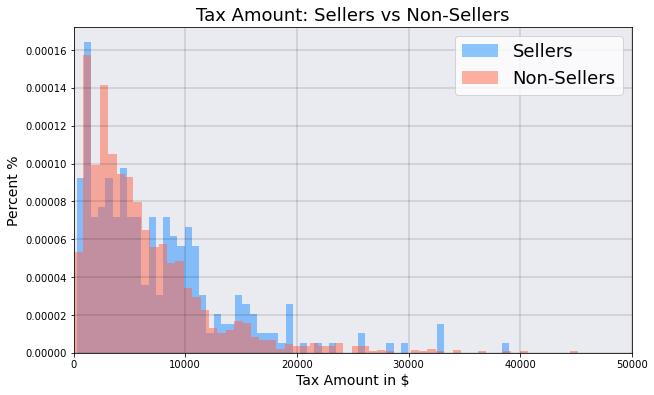

In [222]:
import matplotlib.pyplot as plt
# 1: Tax Amount

fig, ax = plt.subplots(figsize=(10,6))

ax.hist(Hollywood_Sellers_df['TAXAMT'], bins=60, alpha=0.5, density=True, color='dodgerblue', edgecolor='none')
ax.hist(Hollywood_NonSellers_df['TAXAMT'], bins=60, alpha=0.5, density=True, color='tomato', edgecolor='none')
ax.set_title('Tax Amount: Sellers vs Non-Sellers', fontsize=18)
ax.set_xlabel('Tax Amount in $', fontsize=14)
ax.set_ylabel('Percent %', fontsize=14)

ax.legend(['Sellers', 'Non-Sellers'], fontsize=18)
ax.grid(color='black', linestyle='-', linewidth=0.2)
ax.set_facecolor('#eaeaf1')

ax.set_xlim(0,50000)
plt.savefig('Hollywood_TaxAmount_DensityDistribution_SFR.png')

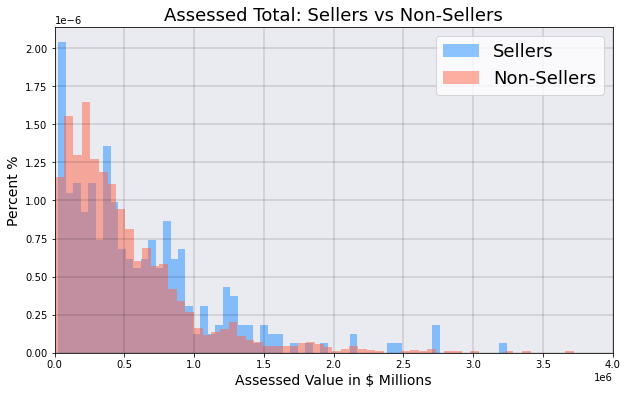

In [225]:
# 2: Assessed Total

fig, ax = plt.subplots(figsize=(10,6))

ax.hist(Hollywood_Sellers_df['ASSDTOTAL'], bins=60, alpha=0.5, density=True, color='dodgerblue', edgecolor='none')
ax.hist(Hollywood_NonSellers_df['ASSDTOTAL'], bins=60, alpha=0.5, density=True, color='tomato', edgecolor='none')
ax.set_title('Assessed Total: Sellers vs Non-Sellers', fontsize=18)
ax.set_xlabel('Assessed Value in $ Millions', fontsize=14)
ax.set_ylabel('Percent %', fontsize=14)

ax.legend(['Sellers', 'Non-Sellers'], fontsize=18)
ax.grid(color='black', linestyle='-', linewidth=0.2)
ax.set_facecolor('#eaeaf1')

ax.set_xlim(0,4000000)
plt.savefig('Hollywood_AssessedTotal_DensityDistribution_SFR.png')

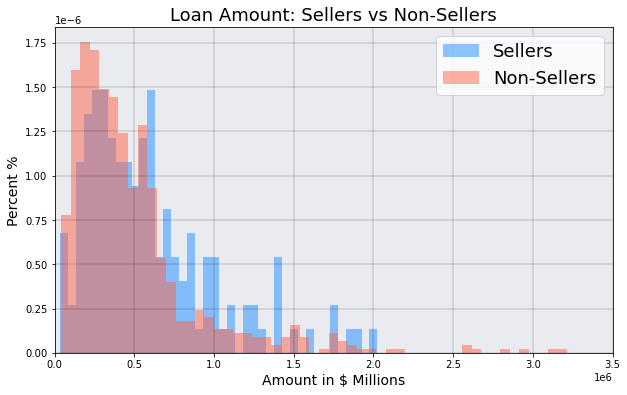

In [232]:
# 3: Loan Amount

fig, ax = plt.subplots(figsize=(10,6))

ax.hist(Hollywood_Sellers_df['LOANAMOUT1'], bins=40, alpha=0.5, density=True, color='dodgerblue', edgecolor='none')
ax.hist(Hollywood_NonSellers_df['LOANAMOUT1'], bins=400, alpha=0.5, density=True, color='tomato', edgecolor='none')
ax.set_title('Loan Amount: Sellers vs Non-Sellers', fontsize=18)
ax.set_xlabel('Amount in $ Millions', fontsize=14)
ax.set_ylabel('Percent %', fontsize=14)

ax.legend(['Sellers', 'Non-Sellers'], fontsize=18)
ax.grid(color='black', linestyle='-', linewidth=0.2)
ax.set_facecolor('#eaeaf1')

ax.set_xlim(0,3500000)
plt.savefig('Hollywood_LoanAmount_DensityDistribution_SFR.png')

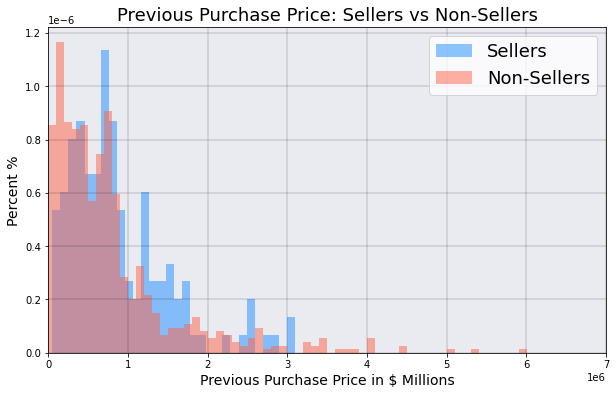

In [236]:
# 4: Price

fig, ax = plt.subplots(figsize=(10,6))

ax.hist(Hollywood_Sellers_df['PRICE'], bins=30, alpha=0.5, density=True, color='dodgerblue', edgecolor='none')
ax.hist(Hollywood_NonSellers_df['PRICE'], bins=400, alpha=0.5, density=True, color='tomato', edgecolor='none')
ax.set_title('Previous Purchase Price: Sellers vs Non-Sellers', fontsize=18)
ax.set_xlabel('Previous Purchase Price in $ Millions', fontsize=14)
ax.set_ylabel('Percent %', fontsize=14)

ax.legend(['Sellers', 'Non-Sellers'], fontsize=18)
ax.grid(color='black', linestyle='-', linewidth=0.2)
ax.set_facecolor('#eaeaf1')

ax.set_xlim(0,7000000)
plt.savefig('Hollywood_PreviousPurchasePrice_DensityDistribution_SFR.png')

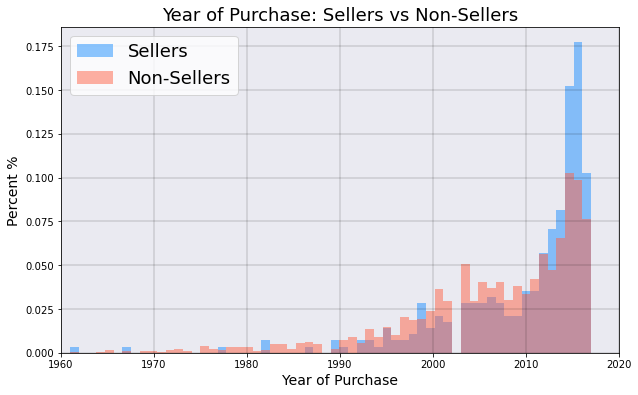

In [240]:
# 5: Docdate year

fig, ax = plt.subplots(figsize=(10,6))

ax.hist(Hollywood_Sellers_df['DOCDATE_YEAR'], bins=60, alpha=0.5, density=True, color='dodgerblue', edgecolor='none')
ax.hist(Hollywood_NonSellers_df['DOCDATE_YEAR'], bins=60, alpha=0.5, density=True, color='tomato', edgecolor='none')
ax.set_title('Year of Purchase: Sellers vs Non-Sellers', fontsize=18)
ax.set_xlabel('Year of Purchase', fontsize=14)
ax.set_ylabel('Percent %', fontsize=14)

ax.legend(['Sellers', 'Non-Sellers'], fontsize=18)
ax.grid(color='black', linestyle='-', linewidth=0.2)
ax.set_facecolor('#eaeaf1')

ax.set_xlim(1960,2020)
plt.savefig('Hollywood_YearOfPurchase_DensityDistribution_SFR.png')